In [87]:
import pandas as pd

sales = pd.read_csv('sales_data_raw.csv')
customer = pd.read_json('customers_data(1).json')

customer

,CustomerID,Name,JoinDate
0,C001,Alice,2022-12-01
1,C002,Bob,2022-11-15
2,C003,Charlie,2023-01-05
3,C004,Diana,2023-01-10
4,C005,Evan,2023-01-20


In [88]:
sales

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount
0,T001,C001,2023-01-01,Widget,2,10,0.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10
2,T003,C003,2023-01-07,Widget,3,10,0.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05
4,T005,C001,2023-01-12,Widget,1,10,0.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20
6,T007,C005,2023-01-18,Widget,4,10,0.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10
8,T009,C003,2023-01-22,Widget,5,10,0.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15


In [89]:
sales['FinalTransactionAmount'] = (sales.Quantity*sales.Price)*(1-sales.Discount)
sales

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,FinalTransactionAmount
0,T001,C001,2023-01-01,Widget,2,10,0.00,20.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10,18.00
2,T003,C003,2023-01-07,Widget,3,10,0.00,30.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05,71.25
4,T005,C001,2023-01-12,Widget,1,10,0.00,10.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20,32.00
6,T007,C005,2023-01-18,Widget,4,10,0.00,40.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10,40.50
8,T009,C003,2023-01-22,Widget,5,10,0.00,50.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15,51.00


In [90]:
sales['TransactionDate'] = pd.to_datetime(sales['TransactionDate'])
customer['JoinDate'] = pd.to_datetime(customer['JoinDate'])
sales.dtypes

TransactionID                     object
CustomerID                        object
TransactionDate           datetime64[ns]
Product                           object
Quantity                           int64
Price                              int64
Discount                         float64
FinalTransactionAmount           float64
dtype: object

In [91]:
customer.dtypes

CustomerID            object
Name                  object
JoinDate      datetime64[ns]
dtype: object

In [114]:
sales.rename({'Date':'TransactionDate'}, inplace = True)
customer.rename({'Date':'JoinDate'}, inplace =True)
merged = customer.merge(sales)
merged

,CustomerID,Name,JoinDate,TransactionID,TransactionDate,Product,Quantity,Price,Discount,FinalTransactionAmount
0,C001,Alice,2022-12-01,T001,2023-01-01,Widget,2,10,0.00,20.00
1,C001,Alice,2022-12-01,T005,2023-01-12,Widget,1,10,0.00,10.00
2,C002,Bob,2022-11-15,T002,2023-01-05,Gadget,1,20,0.10,18.00
3,C002,Bob,2022-11-15,T004,2023-01-10,Gizmo,5,15,0.05,71.25
4,C002,Bob,2022-11-15,T008,2023-01-20,Gizmo,3,15,0.10,40.50
5,C003,Charlie,2023-01-05,T003,2023-01-07,Widget,3,10,0.00,30.00
6,C003,Charlie,2023-01-05,T009,2023-01-22,Widget,5,10,0.00,50.00
7,C004,Diana,2023-01-10,T006,2023-01-15,Gadget,2,20,0.20,32.00
8,C005,Evan,2023-01-20,T007,2023-01-18,Widget,4,10,0.00,40.00
9,C005,Evan,2023-01-20,T010,2023-01-25,Gadget,3,20,0.15,51.00


In [129]:
droped = merged.drop_duplicates()
droped

,CustomerID,Name,JoinDate,TransactionID,TransactionDate,Product,Quantity,Price,Discount,FinalTransactionAmount
0,C001,Alice,2022-12-01,T001,2023-01-01,Widget,2,10,0.00,20.00
1,C001,Alice,2022-12-01,T005,2023-01-12,Widget,1,10,0.00,10.00
2,C002,Bob,2022-11-15,T002,2023-01-05,Gadget,1,20,0.10,18.00
3,C002,Bob,2022-11-15,T004,2023-01-10,Gizmo,5,15,0.05,71.25
4,C002,Bob,2022-11-15,T008,2023-01-20,Gizmo,3,15,0.10,40.50
5,C003,Charlie,2023-01-05,T003,2023-01-07,Widget,3,10,0.00,30.00
6,C003,Charlie,2023-01-05,T009,2023-01-22,Widget,5,10,0.00,50.00
7,C004,Diana,2023-01-10,T006,2023-01-15,Gadget,2,20,0.20,32.00
8,C005,Evan,2023-01-20,T007,2023-01-18,Widget,4,10,0.00,40.00
9,C005,Evan,2023-01-20,T010,2023-01-25,Gadget,3,20,0.15,51.00


In [130]:
droped.groupby('Name')['FinalTransactionAmount'].sum()

Name
Alice       30.00
Bob        129.75
Charlie     80.00
Diana       32.00
Evan        91.00
Name: FinalTransactionAmount, dtype: float64

In [134]:
droped.FinalTransactionAmount.sum()

362.75

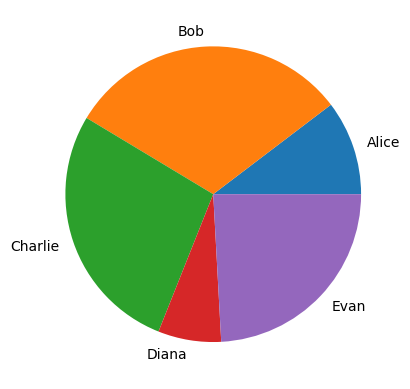

In [168]:
import matplotlib.pyplot as plt
plt.pie(droped.groupby('Name')['Quantity'].sum(), labels = [x for x in droped.Name.unique()])
plt.show()